In [1]:
# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
#style.use('fivethirtyeight')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras

import sys
sys.path.append("..")

import dataset, network, GPR_Model, prob_dist
import WGAN_Model

# please ensure the WGAN_Model.py is edited to use prediction on a
# non-fixed input, as by default the active function is for fixed input.

# Load data

In [2]:
n_features = 4 

data = pd.read_csv("../notebooks/data/jc1data.csv")
print(data.head())

x1, x2, x3 = np.array(data["Surface Area"]*1e13).reshape(-1,1), np.array(data["Concentration"]).reshape(-1,1), np.array(data["Time"]).reshape(-1,1)

X_train = np.concatenate((x1, x2), axis=1)
X_train = np.concatenate((X_train, x3), axis=1)
y_train = np.array(data["Response"]).reshape(-1,1)

X_test = np.concatenate((x1, x2), axis=1)
X_test = np.concatenate((X_test, x3), axis=1)
y_test = np.array(data["Response"]).reshape(-1,1)


   Surface Area  Response  Time  Concentration
0          40.4  101.0178     4              5
1           6.0  103.9040     4              5
2           4.6  105.0749     4              5
3           4.4  113.7357     4              5
4          40.4  103.6135     4              5


In [3]:
# # 2 n_features sets "sinus", "circle", "multi", "moons", "heter"
# # 3 n_features sets "helix", "3d"

# scenario = "heter"
# n_instance = 300 # number of generated points
# n_features = 2

In [4]:
# if scenario in ("3d", "helix") :
#     X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)

#     ax = plt.subplot(projection='3d')
#     ax.scatter(X_train[:,0], X_train[:,1], y_train, c='r')

#     ax.set_zlabel('Z')
#     ax.set_ylabel('Y')
#     ax.set_xlabel('X')

#     plt.tight_layout()
    
# else:
#     X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
#     plt.scatter(X_train,y_train, c='grey')
#     plt.ylabel('Y')
#     plt.xlabel('X')
#     plt.tight_layout()

# WGAN

### Preprocessing

In [5]:
wgan = WGAN_Model.WGAN(n_features)

In [6]:
train_dataset, scaler, X_train_scaled = wgan.preproc(X_train, y_train)
test_dataset, scaler1, X_test_scaled = wgan.preproc(X_test, y_test)

every time the data shape (72, 4)
every time the data shape (72, 4)


### Training

In [7]:
hist = wgan.train(train_dataset, epochs=1000)

Epoch 0/1000
discriminator: -0.444918 - generator: 0.062799 - 6s
Epoch 1/1000
discriminator: -0.249997 - generator: -0.042452 - 0s
Epoch 2/1000
discriminator: -0.206379 - generator: -0.200418 - 0s
Epoch 3/1000
discriminator: -0.150509 - generator: -0.301136 - 0s
Epoch 4/1000
discriminator: -0.312973 - generator: -0.201106 - 0s
Epoch 5/1000
discriminator: -0.089514 - generator: -0.211341 - 0s
Epoch 6/1000
discriminator: 0.014396 - generator: -0.254691 - 0s
Epoch 7/1000
discriminator: -0.015054 - generator: -0.306977 - 0s
Epoch 8/1000
discriminator: -0.020872 - generator: -0.160069 - 0s
Epoch 9/1000
discriminator: -0.047826 - generator: -0.247724 - 0s
Epoch 10/1000
discriminator: 0.033565 - generator: -0.362695 - 0s
Epoch 11/1000
discriminator: -0.044975 - generator: -0.409964 - 0s
Epoch 12/1000
discriminator: -0.012185 - generator: -0.305040 - 0s
Epoch 13/1000
discriminator: 0.156308 - generator: -0.350449 - 0s
Epoch 14/1000
discriminator: 0.063575 - generator: -0.459637 - 0s
Epoch 15/1

discriminator: 0.202803 - generator: -0.760880 - 0s
Epoch 126/1000
discriminator: 0.224725 - generator: -0.679737 - 0s
Epoch 127/1000
discriminator: 0.162778 - generator: -0.659514 - 0s
Epoch 128/1000
discriminator: 0.213648 - generator: -0.700606 - 0s
Epoch 129/1000
discriminator: 0.288395 - generator: -0.766002 - 0s
Epoch 130/1000
discriminator: 0.257767 - generator: -0.757171 - 0s
Epoch 131/1000
discriminator: 0.257452 - generator: -0.702876 - 0s
Epoch 132/1000
discriminator: 0.182939 - generator: -0.637612 - 0s
Epoch 133/1000
discriminator: 0.294914 - generator: -0.700737 - 0s
Epoch 134/1000
discriminator: 0.325041 - generator: -0.649656 - 0s
Epoch 135/1000
discriminator: 0.221310 - generator: -0.736418 - 0s
Epoch 136/1000
discriminator: 0.272275 - generator: -0.670312 - 0s
Epoch 137/1000
discriminator: 0.248024 - generator: -0.662745 - 0s
Epoch 138/1000
discriminator: 0.237374 - generator: -0.683794 - 0s
Epoch 139/1000
discriminator: 0.253616 - generator: -0.686864 - 0s
Epoch 140/

discriminator: 0.245868 - generator: -0.653487 - 0s
Epoch 251/1000
discriminator: 0.132303 - generator: -0.529451 - 0s
Epoch 252/1000
discriminator: 0.290362 - generator: -0.552958 - 0s
Epoch 253/1000
discriminator: 0.293187 - generator: -0.590333 - 0s
Epoch 254/1000
discriminator: 0.208975 - generator: -0.545702 - 0s
Epoch 255/1000
discriminator: 0.260845 - generator: -0.579147 - 0s
Epoch 256/1000
discriminator: 0.176455 - generator: -0.555401 - 0s
Epoch 257/1000
discriminator: 0.329730 - generator: -0.600115 - 0s
Epoch 258/1000
discriminator: 0.291046 - generator: -0.535706 - 0s
Epoch 259/1000
discriminator: 0.221383 - generator: -0.558270 - 0s
Epoch 260/1000
discriminator: 0.273890 - generator: -0.609942 - 0s
Epoch 261/1000
discriminator: 0.361769 - generator: -0.611593 - 0s
Epoch 262/1000
discriminator: 0.253216 - generator: -0.550092 - 0s
Epoch 263/1000
discriminator: 0.243454 - generator: -0.551316 - 0s
Epoch 264/1000
discriminator: 0.238962 - generator: -0.521419 - 0s
Epoch 265/

discriminator: 0.188738 - generator: -0.608529 - 0s
Epoch 373/1000
discriminator: 0.305807 - generator: -0.481146 - 0s
Epoch 374/1000
discriminator: 0.236404 - generator: -0.429638 - 0s
Epoch 375/1000
discriminator: 0.283910 - generator: -0.363757 - 0s
Epoch 376/1000
discriminator: 0.209366 - generator: -0.454223 - 0s
Epoch 377/1000
discriminator: 0.236611 - generator: -0.445256 - 0s
Epoch 378/1000
discriminator: 0.117892 - generator: -0.541079 - 0s
Epoch 379/1000
discriminator: 0.192740 - generator: -0.447660 - 0s
Epoch 380/1000
discriminator: 0.238352 - generator: -0.532626 - 0s
Epoch 381/1000
discriminator: 0.120414 - generator: -0.482024 - 0s
Epoch 382/1000
discriminator: 0.160472 - generator: -0.449731 - 0s
Epoch 383/1000
discriminator: 0.242020 - generator: -0.504967 - 0s
Epoch 384/1000
discriminator: 0.293572 - generator: -0.415921 - 0s
Epoch 385/1000
discriminator: 0.141620 - generator: -0.396568 - 0s
Epoch 386/1000
discriminator: 0.177115 - generator: -0.349437 - 0s
Epoch 387/

discriminator: 0.072661 - generator: -0.307638 - 0s
Epoch 497/1000
discriminator: 0.139149 - generator: -0.385347 - 0s
Epoch 498/1000
discriminator: 0.112505 - generator: -0.356431 - 0s
Epoch 499/1000
discriminator: 0.227491 - generator: -0.383720 - 0s
Epoch 500/1000
discriminator: 0.217058 - generator: -0.284641 - 0s
Epoch 501/1000
discriminator: 0.067482 - generator: -0.319136 - 0s
Epoch 502/1000
discriminator: 0.121904 - generator: -0.302218 - 0s
Epoch 503/1000
discriminator: 0.180146 - generator: -0.235617 - 0s
Epoch 504/1000
discriminator: 0.249035 - generator: -0.255580 - 0s
Epoch 505/1000
discriminator: 0.101440 - generator: -0.330519 - 0s
Epoch 506/1000
discriminator: 0.247342 - generator: -0.373633 - 0s
Epoch 507/1000
discriminator: 0.153338 - generator: -0.249954 - 0s
Epoch 508/1000
discriminator: 0.052881 - generator: -0.333726 - 0s
Epoch 509/1000
discriminator: 0.106609 - generator: -0.403522 - 0s
Epoch 510/1000
discriminator: 0.095844 - generator: -0.387739 - 0s
Epoch 511/

discriminator: 0.100450 - generator: -0.349397 - 0s
Epoch 623/1000
discriminator: -0.069885 - generator: -0.296360 - 0s
Epoch 624/1000
discriminator: -0.106322 - generator: -0.383158 - 0s
Epoch 625/1000
discriminator: 0.143163 - generator: -0.176624 - 0s
Epoch 626/1000
discriminator: 0.134451 - generator: -0.463793 - 0s
Epoch 627/1000
discriminator: 0.127489 - generator: -0.337332 - 0s
Epoch 628/1000
discriminator: 0.101097 - generator: -0.315606 - 0s
Epoch 629/1000
discriminator: 0.076563 - generator: -0.373363 - 0s
Epoch 630/1000
discriminator: 0.122836 - generator: -0.290602 - 0s
Epoch 631/1000
discriminator: 0.095417 - generator: -0.302765 - 0s
Epoch 632/1000
discriminator: -0.063287 - generator: -0.338805 - 0s
Epoch 633/1000
discriminator: 0.105576 - generator: -0.285656 - 0s
Epoch 634/1000
discriminator: 0.167937 - generator: -0.322951 - 0s
Epoch 635/1000
discriminator: 0.025145 - generator: -0.264868 - 0s
Epoch 636/1000
discriminator: -0.014000 - generator: -0.197969 - 0s
Epoch 

discriminator: 0.043262 - generator: -0.120681 - 0s
Epoch 748/1000
discriminator: 0.050254 - generator: -0.176068 - 0s
Epoch 749/1000
discriminator: -0.070908 - generator: -0.171206 - 0s
Epoch 750/1000
discriminator: 0.112175 - generator: -0.160367 - 0s
Epoch 751/1000
discriminator: -0.107326 - generator: -0.151852 - 0s
Epoch 752/1000
discriminator: 0.064980 - generator: -0.186771 - 0s
Epoch 753/1000
discriminator: 0.063467 - generator: -0.111457 - 0s
Epoch 754/1000
discriminator: -0.049588 - generator: -0.181694 - 0s
Epoch 755/1000
discriminator: 0.102044 - generator: -0.159221 - 0s
Epoch 756/1000
discriminator: 0.010642 - generator: -0.053121 - 0s
Epoch 757/1000
discriminator: -0.086650 - generator: -0.206014 - 0s
Epoch 758/1000
discriminator: 0.019545 - generator: -0.115956 - 0s
Epoch 759/1000
discriminator: -0.195494 - generator: -0.093075 - 0s
Epoch 760/1000
discriminator: -0.017564 - generator: -0.100398 - 0s
Epoch 761/1000
discriminator: 0.040038 - generator: -0.132938 - 0s
Epoc

discriminator: -0.128756 - generator: 0.075096 - 0s
Epoch 870/1000
discriminator: -0.235658 - generator: 0.071371 - 0s
Epoch 871/1000
discriminator: 0.017843 - generator: 0.114108 - 0s
Epoch 872/1000
discriminator: -0.092575 - generator: 0.054768 - 0s
Epoch 873/1000
discriminator: -0.251015 - generator: 0.093269 - 0s
Epoch 874/1000
discriminator: -0.078479 - generator: 0.017434 - 0s
Epoch 875/1000
discriminator: -0.082558 - generator: 0.108117 - 0s
Epoch 876/1000
discriminator: -0.137571 - generator: 0.191803 - 0s
Epoch 877/1000
discriminator: -0.010389 - generator: 0.048106 - 0s
Epoch 878/1000
discriminator: -0.077361 - generator: 0.121518 - 0s
Epoch 879/1000
discriminator: -0.082156 - generator: 0.128869 - 0s
Epoch 880/1000
discriminator: 0.023149 - generator: 0.048302 - 0s
Epoch 881/1000
discriminator: -0.121817 - generator: 0.147182 - 0s
Epoch 882/1000
discriminator: -0.118949 - generator: 0.062378 - 0s
Epoch 883/1000
discriminator: -0.072362 - generator: 0.081927 - 0s
Epoch 884/10

discriminator: -0.150422 - generator: 0.319342 - 0s
Epoch 997/1000
discriminator: -0.105049 - generator: 0.316647 - 0s
Epoch 998/1000
discriminator: -0.175638 - generator: 0.364575 - 0s
Epoch 999/1000
discriminator: -0.065449 - generator: 0.365404 - 0s


Loss: 


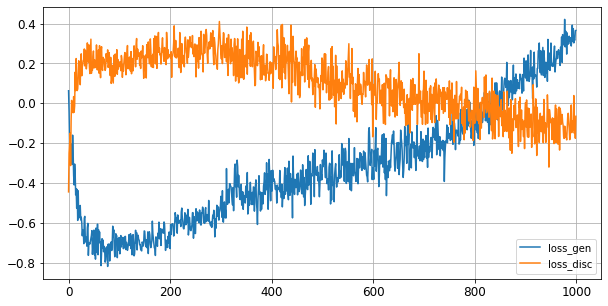

In [8]:
# plot loss
print('Loss: ')
fig, ax = plt.subplots(1,1, figsize=[10,5])
ax.plot(hist)
ax.legend(['loss_gen', 'loss_disc'])
#ax.set_yscale('log')
ax.grid()
plt.show()

In [9]:
X_generated = wgan.predict(X_test_scaled, scaler)

Optimizing latent space for point  0  /  72
Optimizing latent space for point  1  /  72
Optimizing latent space for point  2  /  72
Optimizing latent space for point  3  /  72
Optimizing latent space for point  4  /  72
Optimizing latent space for point  5  /  72
Optimizing latent space for point  6  /  72
Optimizing latent space for point  7  /  72
Optimizing latent space for point  8  /  72
Optimizing latent space for point  9  /  72
Optimizing latent space for point  10  /  72
Optimizing latent space for point  11  /  72
Optimizing latent space for point  12  /  72
Optimizing latent space for point  13  /  72
Optimizing latent space for point  14  /  72
Optimizing latent space for point  15  /  72
Optimizing latent space for point  16  /  72
Optimizing latent space for point  17  /  72
Optimizing latent space for point  18  /  72
Optimizing latent space for point  19  /  72
Optimizing latent space for point  20  /  72
Optimizing latent space for point  21  /  72
Optimizing latent sp

# Gaussian Process Regression

In [10]:
ypred_GPR = GPR_Model.train(X_train, y_train, X_test, n_features)

# Comparison

### Prediction Plots

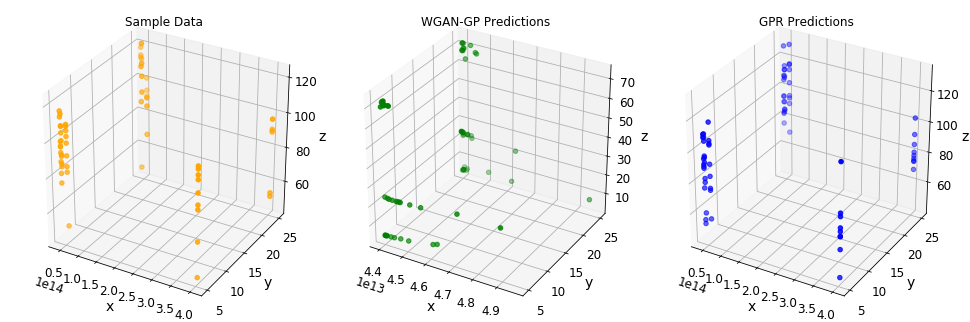

In [11]:
# generates the plots
scenario = "3d"
if scenario in ("3d", "helix"):
    fig = plt.figure(figsize=(13, 4))

    #---- First subplot
    ax = fig.add_subplot(1, 3, 1, projection='3d')
    ax.scatter(X_test[:,0], X_test[:,1], y_test, color='orange')
    ax.set_title("Sample Data")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
#     ax.set_xlim(-4,4)
#     ax.set_ylim(-4,4)
#     ax.set_zlim(0,7)

    ax = fig.add_subplot(1, 3, 2, projection='3d')
    ax.scatter(X_generated[:,0], X_generated[:,1], X_generated[:,2], color='green', label='Generated Data')
    ax.set_title("WGAN-GP Predictions")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
#     ax.set_xlim(-4,4)
#     ax.set_ylim(-4,4)
#     ax.set_zlim(0,7)

    ax = fig.add_subplot(1, 3, 3, projection='3d')
    ax.scatter(X_test[:,0], X_test[:,1], ypred_GPR, c='b', label='Generated Data')
    ax.set_title("GPR Predictions")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
#     ax.set_xlim(-4,4)
#     ax.set_ylim(-4,4)
#     ax.set_zlim(0,7)
    
    plt.tight_layout(pad=-1, w_pad=0.8, h_pad=0)
    

else:
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True, sharex=True)
    axes[0].scatter(X_test, y_test, label='Real Data', color='orange')
    axes[0].set_title("Sample Data")
    axes[0].set_xlabel("x")
    axes[0].set_ylabel("y")

    axes[1].scatter(X_generated[:,0], X_generated[:,1], label="Generated Data by WGAN-GP", color='green')
    axes[1].set_title("WGAN-GP Predictions")
    axes[1].set_xlabel("x")

    axes[2].scatter(X_test, ypred_GPR, label='Generated Data by GPR')
    axes[2].set_title("GPR Predictions")
    axes[2].set_xlabel("x")

### Probability Density Plots

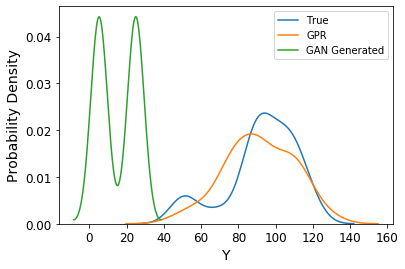

In [12]:
sns.distplot(y_train, hist=False, label='True')
sns.distplot(ypred_GPR, hist=False, label='GPR')
sns.distplot(X_generated[:,1], hist=False, label='GAN Generated')
plt.xlabel("Y")
plt.ylabel("Probability Density")
plt.legend(loc='best');

In [13]:
# user inputs
values = [-0,0.75,1.25] # input values
bounds = 0.05 # determine interval size

# for graph axis
x_min = -1
x_max = 4

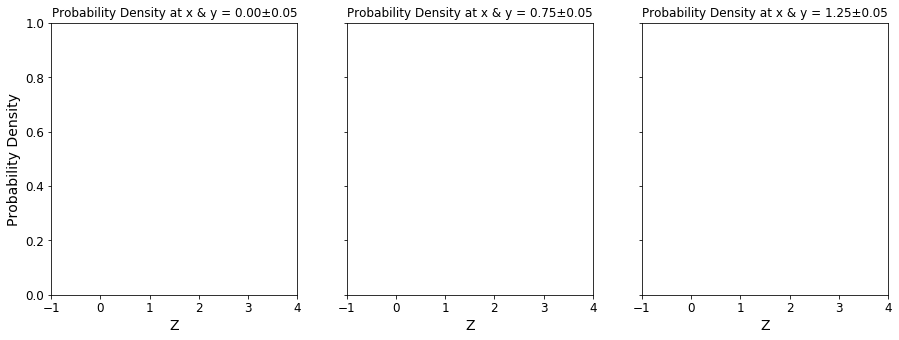

In [14]:
# generating the plots
if scenario in ("3d", "helix"):
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True, sharex=True)

    input_y = prob_dist.y2_values(X_test[:,0], X_test[:,1], y_test, values[0], bounds)
    wgan_y = prob_dist.y2_values(X_generated[:,0], X_generated[:,1], X_generated[:,2], values[0], bounds)
    gpr_y = prob_dist.y2_values(X_test[:,0], X_test[:,1], ypred_GPR, values[0], bounds)

    sns.kdeplot(input_y, bw=.2, label='True', color="orange", ax=ax1, shade=True)
    sns.kdeplot(wgan_y, bw=.2, label='WGAN-GP', color="green", ax=ax1)
    sns.kdeplot(gpr_y, bw=.2, label='GPR', color="blue", ax=ax1)
    ax1.set_title("Probability Density at x & y = %1.2f" %values[0] + "±%1.2f" %bounds)
    ax1.set_xlabel("Z")
    ax1.set_ylabel("Probability Density")
    ax1.set_xlim(x_min, x_max)

    input_y = prob_dist.y2_values(X_test[:,0], X_test[:,1], y_test, values[1], bounds)
    wgan_y = prob_dist.y2_values(X_generated[:,0], X_generated[:,1], X_generated[:,2], values[1], bounds)
    gpr_y = prob_dist.y2_values(X_test[:,0], X_test[:,1], ypred_GPR, values[1], bounds)

    sns.kdeplot(input_y, bw=.2, label='True', color="orange", ax=ax2, shade=True)
    sns.kdeplot(wgan_y, bw=.2, label='WGAN-GP', color="green", ax=ax2)
    sns.kdeplot(gpr_y, bw=.2, label='GPR', color="blue", ax=ax2)
    ax2.set_title("Probability Density at x & y = %1.2f" %values[1] + "±%1.2f" %bounds)
    ax2.set_xlabel("Z")
    ax2.set_xlim(x_min, x_max)

    input_y = prob_dist.y2_values(X_test[:,0], X_test[:,1], y_test, values[2], bounds)
    wgan_y = prob_dist.y2_values(X_generated[:,0], X_generated[:,1], X_generated[:,2], values[2], bounds)
    gpr_y = prob_dist.y2_values(X_test[:,0], X_test[:,1], ypred_GPR, values[2], bounds)

    sns.kdeplot(input_y, bw=.2, label='True', color="orange", ax=ax3, shade="fill")
    sns.kdeplot(wgan_y, bw=.2, label='WGAN-GP', color="green", ax=ax3)
    sns.kdeplot(gpr_y, bw=.2, label='GPR', color="blue", ax=ax3)
    ax3.set_title("Probability Density at x & y = %1.2f" %values[2] + "±%1.2f" %bounds)
    ax3.set_xlabel("Z")
    ax3.set_xlim(x_min, x_max)

else:
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True, sharex=True)

    wgan_y = prob_dist.y_values(X_generated[:,0], X_generated[:,1], values[0], bounds)
    input_y = prob_dist.y_values(X_test, y_test, values[0], bounds)
    gpr_y = prob_dist.y_values(X_test, ypred_GPR, values[0], bounds
                                  )
    sns.kdeplot(input_y, bw=.2, label='True', color="orange", ax=ax1, shade="fill")
    sns.kdeplot(wgan_y, bw=.2, label='WGAN-GP', color="green", ax=ax1)
    sns.kdeplot(gpr_y, bw=.2, label='GPR', color="blue", ax=ax1)
    ax1.set_title("Probability Density at x = %1.2f" %values[0] + "±%1.2f" %bounds)
    ax1.set_xlabel("Y")
    ax1.set_ylabel("Probability Density")
    ax1.set_xlim(x_min, x_max)

    wgan_y = prob_dist.y_values(X_generated[:,0], X_generated[:,1], values[1], bounds)
    input_y = prob_dist.y_values(X_test, y_test, values[1], bounds)
    gpr_y = prob_dist.y_values(X_test, ypred_GPR, values[1], bounds
                                  )
    sns.kdeplot(input_y, bw=.2, label='True', color="orange", ax=ax2, shade="fill")
    sns.kdeplot(wgan_y, bw=.2, label='WGAN-GP', color="green", ax=ax2)
    sns.kdeplot(gpr_y, bw=.2, label='GPR', color="blue", ax=ax2)
    ax2.set_title("Probability Density at x = %1.2f" %values[1] + "±%1.2f" %bounds)
    ax2.set_xlabel("Y")
    ax2.set_xlim(x_min, x_max)

    wgan_y = prob_dist.y_values(X_generated[:,0], X_generated[:,1], values[2], bounds)
    input_y = prob_dist.y_values(X_test, y_test, values[2], bounds)
    gpr_y = prob_dist.y_values(X_test, ypred_GPR, values[2], bounds
                                  )
    sns.kdeplot(input_y, bw=.2, label='True', color="orange", ax=ax3, shade="fill")
    sns.kdeplot(wgan_y, bw=.2, label='WGAN-GP', color="green", ax=ax3)
    sns.kdeplot(gpr_y, bw=.2, label='GPR', color="blue", ax=ax3)
    ax3.set_title("Probability Density at x = %1.2f" %values[2] + "±%1.2f" %bounds)
    ax3.set_xlabel("Y")
    ax3.set_xlim(x_min, x_max)